In [1]:
import pandas as pd
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=100, n_features=20, centers=15, cluster_std=2.0, shuffle=True, random_state=0)
variables = ['辛さ','重厚','スパイシー','果実味','コク','酸味','落ち着き','香り','華やか','ジューシー','熟成','透明感','シャープ','力強い','フレッシュ','渋み','苦味','樽','エキゾチック','粘性']

df = pd.DataFrame(X, columns=variables)
print(df)

           辛さ         重厚      スパイシー        果実味         コク         酸味  \
0   -6.867455  -5.634108  -0.881840  -6.482588  -7.159777  -6.394668   
1    8.591997  -2.939312  -2.795689   8.441495   8.202073   5.035962   
2    0.246883   4.617195   3.212311   1.596973  -3.055192   0.042299   
3    5.007082   2.136003  11.041768   2.046806  -2.076545   4.375675   
4   -4.010045   4.244966   6.905713  -5.643761   6.686582   0.799046   
5   11.458459   0.503817  -1.909037   6.150392  -8.568203  -0.035392   
6   -0.653447  -6.377730   6.315381 -10.059298   3.663191   3.605400   
7   -6.133775  -5.448214 -13.063670  10.050953  -0.316636   6.468255   
8    4.909424  -2.865518   6.103814   8.303592   7.671129  12.401938   
9    8.385367  -8.989615   0.226857  -8.780719   5.776530  -2.575645   
10  10.487198   4.053947  -2.335671   5.389805  -9.743768   4.438916   
11   3.003465  -5.118994   5.432843  12.186415  -1.839396   1.006001   
12  11.201406   6.101022  -1.140520   3.995287 -10.527581   4.39

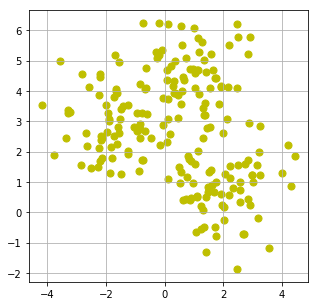

In [2]:
from sklearn.datasets import make_blobs
#X, y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.6, shuffle=True, random_state=0)
X, y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=1.0, shuffle=True, random_state=0)
#　n_samples:サンプル数　n_features：特徴量（説明変数）の数　centers:クラスタの数　cluster_std:クラスタ内の標準偏差（ばらつき度合い）　shuffle:サンプルをシャッフル　random_state:乱数生成を固定

import matplotlib.pyplot as plt

plt.figure(figsize =(5,5))
plt.scatter(X[:,0], X[:,1], c='y' , marker='o', s=50)
plt.grid()
plt.show()

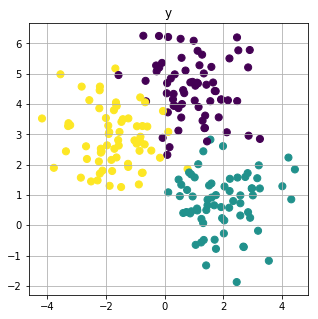

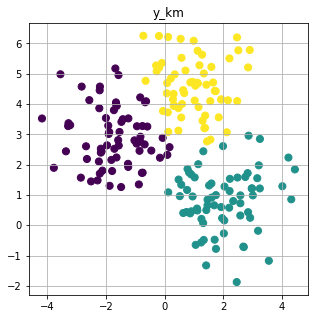

In [3]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, init='random', n_init=10, max_iter=300, tol=1e-04, random_state=0)
y_km = km.fit_predict(X)
#print(y_km)

plt.figure(figsize =(5,5))
plt.title('y')
plt.scatter(X[:,0], X[:,1], c=y , marker='o', s=50)
plt.grid()

plt.figure(figsize =(5,5))
plt.title('y_km')
plt.scatter(X[:,0], X[:,1], c=y_km , marker='o', s=50)
plt.grid()
plt.show()

# クラスタの求め方

## エルボー法
SSEは中心点との距離の和ですから、kの値が増えれば小さくなっていくというのは直感的に分かるかと思います。極端な例として、クラスタ数k＝サンプル数nになれば、SSEは0になります。SSEは小さい方が良いけれど、ただ少なくしようとしたらk=nになってしまいます。見つけたいのは、kを増やしたとしてもSSEがあまり変わらなくなる点です。

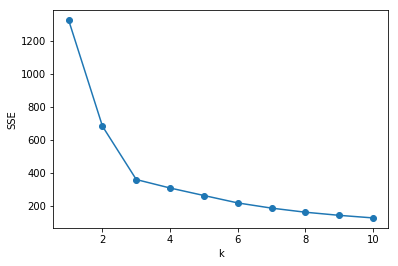

In [4]:
SSE = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, init='random', n_init=10, max_iter=300, tol=1e-04, random_state=0)
    km.fit(X)
    SSE.append(km.inertia_) #SSEの値

plt.plot(range(1,11), SSE, marker='o')
plt.xlabel('k')
plt.ylabel('SSE')
plt.show()

__結局のところ、クラスタ数は人間が恣意的に決めるものというのは忘れてはいけません。__

## シルエット分析
各クラスタのサンプルの凝集度（まとまり具合）を表示して、それぞれを比べます。

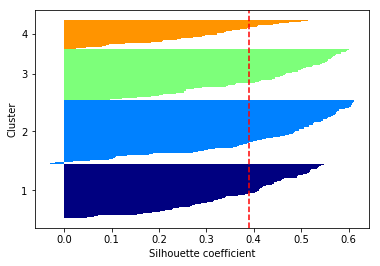

In [5]:
km = KMeans(n_clusters=4, init='random', n_init=10, max_iter=300, tol=1e-04, random_state=0)
y_km = km.fit_predict(X)
from matplotlib import cm
from sklearn.metrics import silhouette_samples
import numpy as np

cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(i / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, edgecolor='none', color=color)
    yticks.append((y_ax_lower + y_ax_upper) / 2)
    y_ax_lower += len(c_silhouette_vals)

silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--")
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.show()

大事なことは、３つのクラスタそれぞれの形がほぼ同じになること。
k=4や5にすると確かにシルエットが崩れてくる（同じ形じゃない）。




# 試し打ち

In [6]:
from sklearn.datasets import load_iris
import pandas as pd
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = iris.target

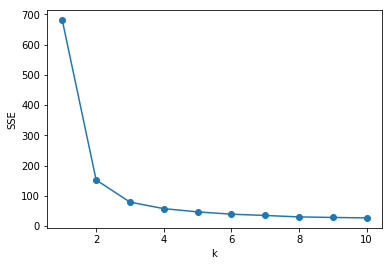

In [7]:
SSE = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, init='random', n_init=10, max_iter=300, tol=1e-04, random_state=0)
    km.fit(X)
    SSE.append(km.inertia_) #SSEの値

plt.plot(range(1,11), SSE, marker='o')
plt.xlabel('k')
plt.ylabel('SSE')
plt.show()

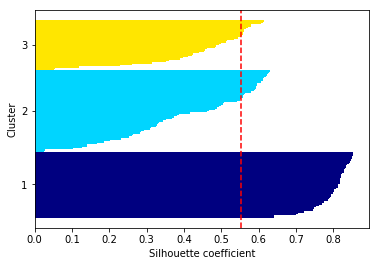

In [11]:
km = KMeans(n_clusters=3, init='random', n_init=10, max_iter=300, tol=1e-04, random_state=0)
y_km = km.fit_predict(X)
from matplotlib import cm
from sklearn.metrics import silhouette_samples
import numpy as np

cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(i / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, edgecolor='none', color=color)
    yticks.append((y_ax_lower + y_ax_upper) / 2)
    y_ax_lower += len(c_silhouette_vals)

silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--")
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.show()